###Exploratory Data Analysis


In [1]:
import random              
import numpy as np         
from PIL import Image      
import matplotlib.pyplot as plt  


In [2]:

from pathlib import Path

#project root
BASE_DIR = Path.cwd()

# from data_setup.py
DATASET_DIR = BASE_DIR / "dataset"

CLASSES = ["rock", "paper", "scissors"]


Data exploration

In [3]:


#defining dataset root directory and class names
data_dir = "dataset"
classes = ['rock', 'paper', 'scissors']

#counting number of images per class

img_counts = {}

for cls in CLASSES:
    cls_path = DATASET_DIR / cls
    img_counts[cls] = len(list(cls_path.glob("*.png")))

print("Number of images per class:")
for k, v in img_counts.items():
    print(f"{k}: {v}")

Number of images per class:
rock: 726
paper: 712
scissors: 750


Visualization of class distribution

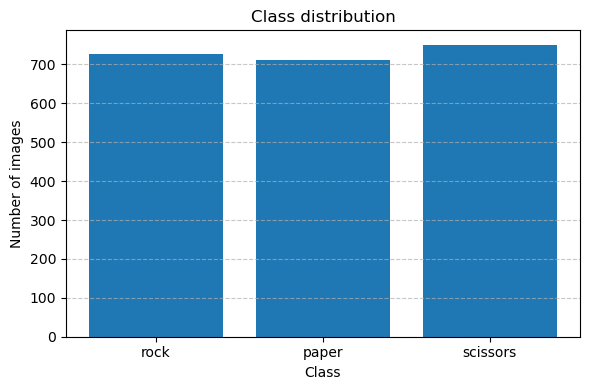

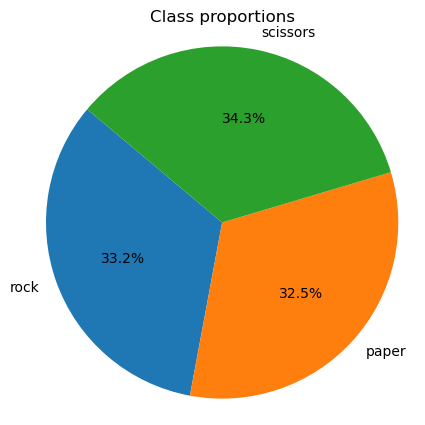

In [4]:

#bar chart
import matplotlib.pyplot as plt

labels = CLASSES
values = [img_counts[cls] for cls in labels]

plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


#pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Class proportions")
plt.axis("equal")
plt.show()




Sample images

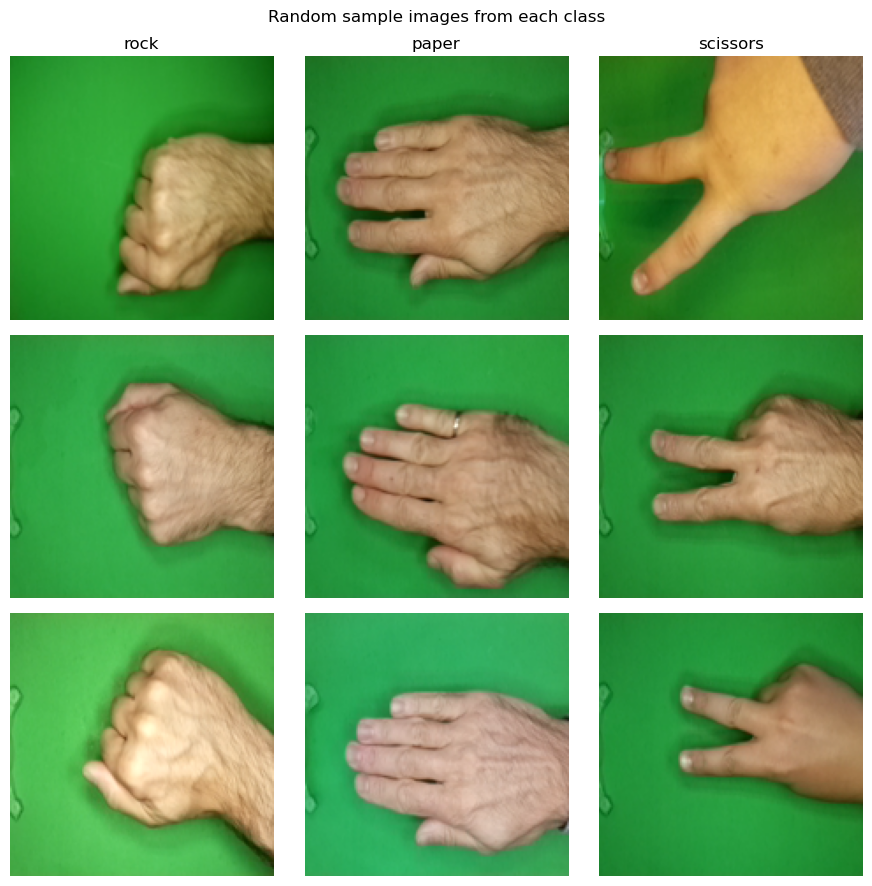

In [7]:

#displaying random sample images from each class


ROWS = 3
COLS = len(CLASSES)

plt.figure(figsize=(COLS * 3, ROWS * 3))

#seed
random.seed(42)


for col_idx, cls in enumerate(CLASSES):
    cls_dir = DATASET_DIR / cls
    
    image_files = sorted(cls_dir.glob("*.png"))
    sampled_files = random.sample(image_files, ROWS)

    for row_idx, img_path in enumerate(sampled_files):
        img = Image.open(img_path)
        img = img.resize((150, 150))  #only for visualization
        
        plt.subplot(ROWS, COLS, row_idx * COLS + col_idx + 1)
        plt.imshow(img)
        plt.axis("off")

        if row_idx == 0:
            plt.title(cls)

plt.suptitle("Random sample images from each class")
plt.tight_layout()
plt.show()
